In [1]:
### Hepatitis-C Prediction
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./dataset/HepatitisCdata.csv')
df.head(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB
None
       Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   3

In [4]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [5]:
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].median(), inplace=True)
df = df.dropna(subset=['ALB', 'ALT', 'PROT'])
df.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [6]:
df.shape

(612, 14)

In [7]:
df["Category"].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                28
1=Hepatitis                23
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [8]:
### make sure there are no categorical clms present
df.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [9]:
corr_metrix = df.corr()
corr_metrix['Category']*100

ValueError: could not convert string to float: '0=Blood Donor'

<Axes: >

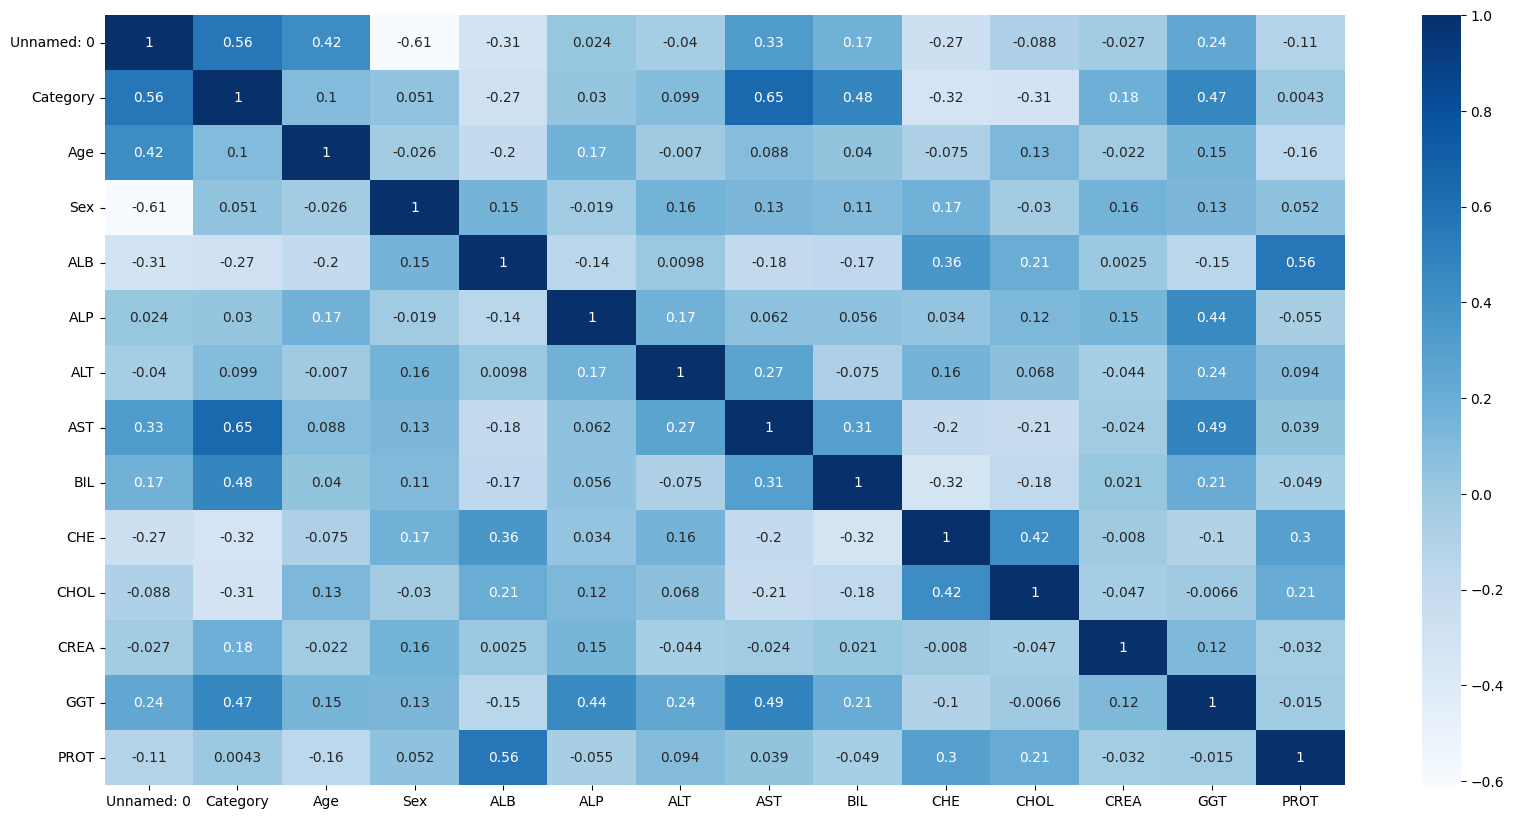

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_metrix, annot=True, cmap='Blues')

In [ ]:
### Category and sex are two categorical objects needed to convert numerical data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category']= le.fit_transform(df['Category'])
df['Sex']= le.fit_transform(df['Sex'])
df.describe()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,306.673203,0.372549,47.397059,0.611111,41.650000,68.303501,28.377124,34.629902,11.004902,8.206487,5.366176,81.258333,39.295752,72.047549
std,177.087312,1.032261,10.047230,0.487897,5.721926,25.702254,25.470818,33.010979,17.100164,2.193388,1.125956,49.858320,54.575007,5.391748
min,1.000000,0.000000,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,153.750000,0.000000,39.000000,0.000000,38.800000,52.900000,16.400000,21.600000,5.275000,6.937500,4.617500,67.000000,15.700000,69.300000
50%,306.500000,0.000000,47.000000,1.000000,41.950000,66.600000,22.950000,25.850000,7.300000,8.265000,5.300000,76.850000,23.300000,72.200000
75%,459.250000,0.000000,54.000000,1.000000,45.225000,79.375000,32.925000,32.825000,11.200000,9.600000,6.060000,88.000000,40.125000,75.400000
max,615.000000,4.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


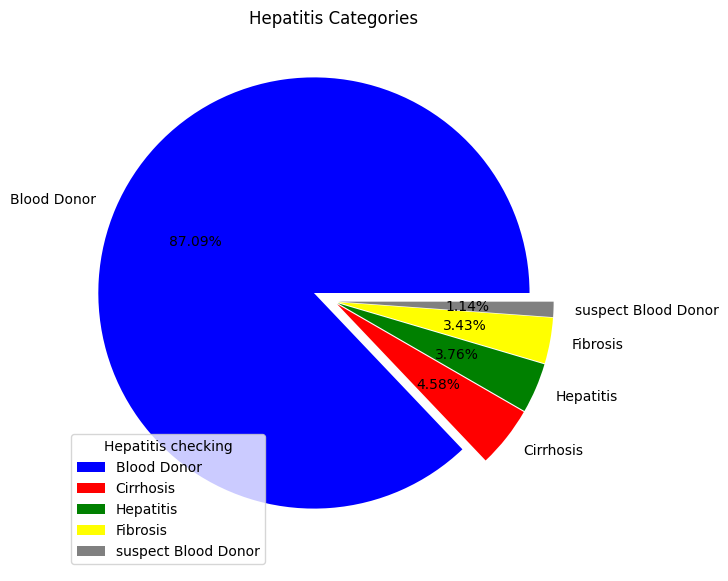

In [ ]:
plt.figure(figsize = (15,7))
colors = ['blue', 'red', 'green', 'yellow','pink']
plt.title("Hepatitis Categories")
plt.pie(df['Category'].value_counts(), explode = (0.1, 0.02, 0.02,0.02,0.02), labels = ['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis','suspect Blood Donor'], autopct = "%1.2f%%", colors = colors)
plt.legend(title = "Hepatitis checking", loc = "lower left")

In [ ]:
df.

Category
0    533
4     28
2     23
3     21
1      7
Name: count, dtype: int64

In [ ]:
X = df.drop(['Category','Unnamed: 0'], axis=1)
y = df['Category']
print(X.shape,y.shape)

(612, 12) (612,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=152)
print(X_train.shape,X_test.shape)

(489, 12) (123, 12)


In [ ]:
### Random Forest classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)




rf_train_acc = rf.score(X_train,y_train)*100
rf_test_acc = rf.score(X_test,y_test)*100
print('Training Acc-> ',rf_train_acc)
print('Testing Acc -> ', rf_test_acc)

Score = {}
n_estimators = [10,20,30,50,75]
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2']
for n in n_estimators:
    for c in criterion:
        for mf in max_features:
            model = RandomForestClassifier(n_estimators=n,criterion=c,max_features=mf)
            model.fit(X_train,y_train)
            acc = model.score(X_test,y_test)*100
            Score[n,c,mf] = acc

max(Score.values()) 
tunedVal = max(Score,key=Score.get)
print(tunedVal,max(Score.values()))



Training Acc->  100.0
Testing Acc ->  96.7479674796748
(10, 'log_loss', 'log2') 96.7479674796748


In [ ]:

### Random Forest classification after imabalnce and grid search
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',
                            n_estimators=10,
                            criterion='entropy',
                            max_features='sqrt'
                        )
rf.fit(X_train,y_train)


rf_train_acc = rf.score(X_train,y_train)*100
rf_test_acc = rf.score(X_test,y_test)*100
print('Training Acc-> ',rf_train_acc)
print('Testing Acc -> ', rf_test_acc)

Training Acc->  99.38650306748467
Testing Acc ->  94.3089430894309


In [ ]:
y_pred = rf.predict(X_test)
print(y_pred)

from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error,mean_squared_error
cm = confusion_matrix(y_test, y_pred)
cm

[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
 0 0 0 4 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0]


array([[108,   0,   0,   1,   0],
       [  2,   0,   0,   0,   0],
       [  2,   0,   1,   0,   0],
       [  0,   0,   0,   2,   0],
       [  1,   1,   0,   0,   5]], dtype=int64)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       109
           1       0.00      0.00      0.00         2
           2       1.00      0.33      0.50         3
           3       0.67      1.00      0.80         2
           4       1.00      0.71      0.83         7

    accuracy                           0.94       123
   macro avg       0.72      0.61      0.62       123
weighted avg       0.94      0.94      0.93       123



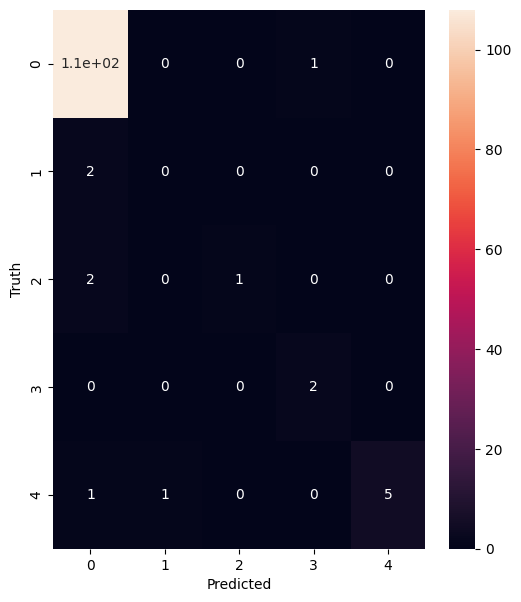

In [ ]:
plt.figure(figsize=(6,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(y_test, y_pred))